In [1]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
for i,file in enumerate(os.listdir('./data/candidate_data/')):
    a = pd.read_csv('./data/candidate_data/' + file)
    if i == 0:
        data_df = a
    else:
        data_df = data_df.append(a)
data_df.head()

FileNotFoundError: [WinError 3] The system cannot find the path specified: './data/candidate_data/'

In [ ]:
total_from_bigquery = 1445120
total_from_bigquery - len(data_df)

In [82]:
data_df = data_df.rename(columns={'lauthor':'author'})
data_df.to_csv('candidate_data_all.csv', encoding='utf-8')

# What is the dist of post history size?

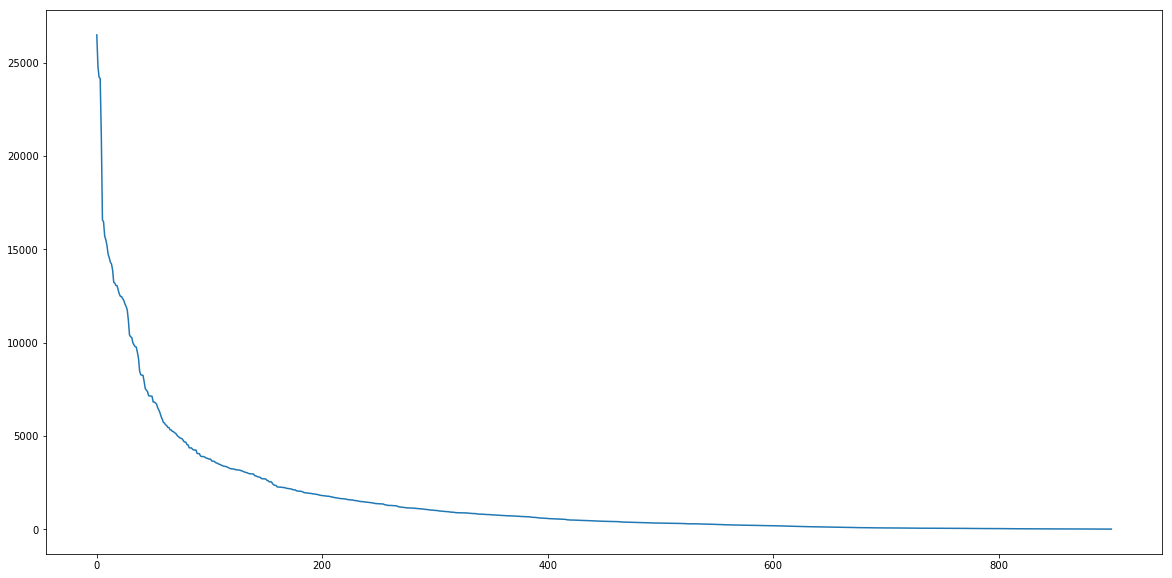

In [92]:
from collections import Counter
author_counts = Counter(data_df['author']).values()

x = range(len(author_counts))
y = sorted(author_counts, reverse=True)

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()

In [93]:
author_counts = Counter(data_df['author'])
sorted(author_counts, key=author_counts.get)
for w in sorted(author_counts, key=author_counts.get, reverse=True):
  print(w, author_counts[w])

maunaloona 26479
throwahoymatie 24794
of_ice_and_rock 24218
conspiracy_thug 24140
skekze 21072
jakkubus 16571
wardenclyffe56 16456
brackner 15706
intotheopen 15501
kekehippo 15213
gmoney8869 14742
roflocalypselol 14558
northernspectre 14310
catholic_extremist 14212
sub116610 13897
xereeto 13233
verinio 13176
in_liberty 13052
smookykins 13045
erowidtrance 12808
datastream 12596
thehighesteagle 12467
honorablejudgeholden 12461
cantseeshit 12349
tucos_cousin 12250
diarrhea_van_frank 12059
needhelpwithexcel 11934
olican101 11749
golden_dawn 11195
anal_vacuum 10407
trumptrumptrumptrump 10311
cattrump 10270
snakesovereagles 9990
ytumith 9869
botulox 9780
diversity_is_racism 9758
spirolateral 9477
mistermeatloaf 9151
faliceer 8467
gingerbeardy 8278
strid 8252
good-writer 8241
lordthat100188 7908
azzmo 7529
triquetra4715 7449
superdanceparty 7370
badgoywithagun 7151
tomroberts2016 7141
dailmail_bot 7133
o5-8 7120
soefianb 6815
aldehyde 6814
puffykilled2pac 6768
yesofcoursenaturally 6702
stinkf

# Check for missing dates

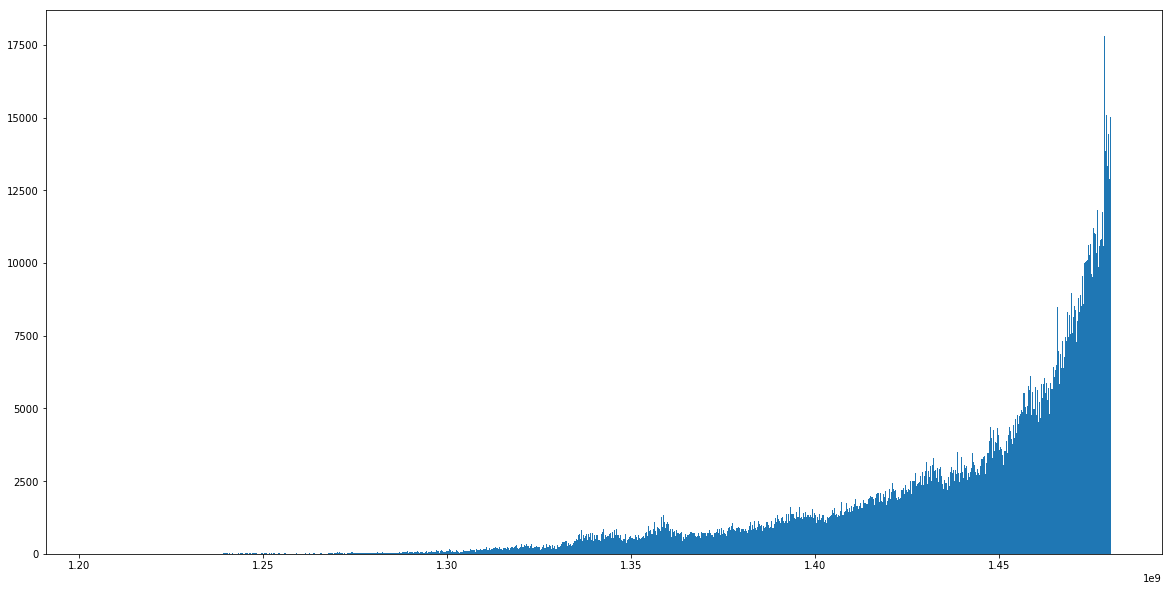

In [94]:
plt.figure(figsize=(20,10))
plt.hist(data_df['created_utc'],bins = 1000)
plt.show()

# First post to r/altright

In [95]:
earliest_posts_df = data_df[data_df['subreddit'] == 'altright']
earliest_posts_df = earliest_posts_df.groupby(['author'])['created_utc'].min().reset_index()
earliest_posts_df['1yr_thresh'] = earliest_posts_df['created_utc'].apply(lambda x:x - 31536000)
earliest_posts_df.head()

,author,created_utc,1yr_thresh
0,-reactionary_vizier-,1479133511,1447597511
1,-resputin-,1479052497,1447516497
2,-the_blazer-,1476997523,1445461523
3,-venator-,1470065349,1438529349
4,12_f_taiwan,1468198891,1436662891


In [96]:
data_df[data_df['author'] == '5000ninjas'].sort_values('created_utc')

,author,subreddit,body,created_utc,score
5291,5000ninjas,darksouls3,When does Ludleth scream or beg for mercy? Jus...,1465132643,6
1703,5000ninjas,darksouls3,"I'll be damned, he's right. Tested it myself a...",1465149973,7
415,5000ninjas,darksouls3,"I can see the marketing now. ""Be frustrated on...",1476975637,5
3237,5000ninjas,altright,"Total cuck here. Tennessee native, married to ...",1479430890,-3
10422,5000ninjas,altright,http://gq-images.condecdn.net/image/E8GdknR5L1...,1479514530,2
5444,5000ninjas,altright,"I believe your position is ""my life is unsatis...",1479516313,1
5759,5000ninjas,altright,Love that my comment got downvoted out of the ...,1479517057,1
2669,5000ninjas,darksouls3,"Read ""abyss watchers fart"" and got excited",1479557512,2
9396,5000ninjas,darksouls3,"That's cool that you write lore too, you'd thi...",1479560384,3
12670,5000ninjas,altright,Cool story bro,1479731409,0


In [252]:
# Filter by accounts > 1 year in usage
candidate = []
for i in range(len(earliest_posts_df)):
    author = earliest_posts_df.loc[i,'author']
    thresh = earliest_posts_df.loc[i,'1yr_thresh']
    candidate.append(sum(data_df[data_df['author'] == author]['created_utc'] < thresh))
earliest_posts_df['candidate'] = [1 if i > 0 else 0 for i in candidate]
earliest_posts_df = earliest_posts_df[earliest_posts_df['candidate'] == 1]
earliest_posts_df


100%|████████████████████████████████████████████████████████████████████████████████| 901/901 [02:12<00:00,  6.94it/s]


,author,created_utc,1yr_thresh,candidate
0,-reactionary_vizier-,1479133511,1447597511,1
2,-the_blazer-,1476997523,1445461523,1
3,-venator-,1470065349,1438529349,1
4,12_f_taiwan,1468198891,1436662891,1
13,3rdnipp1e,1476915384,1445379384,1
16,7yrlrkr,1469823459,1438287459,1
18,_hungry_ghost,1476556949,1445020949,1
20,_the_burn_,1474301085,1442765085,1
22,a_can_of_tea,1479174791,1447638791,1
23,a_mathematician,1475548637,1444012637,1


# Top Subreddits (Overall)

In [271]:
subreddit_counts = data_df.groupby(['subreddit','author']).count().reset_index()
candidates = [True if i in list(earliest_posts_df['author']) else False for i in subreddit_counts['author']]
subreddit_counts = subreddit_counts[candidates]
subreddit_counts = subreddit_counts.groupby(['subreddit'])['author'].count().reset_index()
subreddit_counts = subreddit_counts.sort_values('author', ascending=False)

,subreddit,author
5212,altright,383
451,AskReddit,309
4543,The_Donald,302
9772,worldnews,291
9348,todayilearned,263
8345,politics,258
7957,news,257
8282,pics,255
6729,funny,247
9600,videos,244


# Top Subreddits by Time from First Post

In [285]:
subreddit_time_df = earliest_posts_df.copy()
del subreddit_time_df['1yr_thresh']
del subreddit_time_df['candidate']

for i in range(8):
    cur_month = str((i+1)*-6) + 'mo'
    if i == 0:
        subreddit_time_df[cur_month] = subreddit_time_df['created_utc'].apply(lambda x:int(x - 31536000/2))
    else:
        subreddit_time_df[cur_month] = subreddit_time_df[last_month].apply(lambda x:int(x - 31536000/2))
    last_month = cur_month

subreddit_time_df.head()

,author,created_utc,-6mo,-12mo,-18mo,-24mo,-30mo,-36mo,-42mo,-48mo
0,-reactionary_vizier-,1479133511,1463365511,1447597511,1431829511,1416061511,1400293511,1384525511,1368757511,1352989511
2,-the_blazer-,1476997523,1461229523,1445461523,1429693523,1413925523,1398157523,1382389523,1366621523,1350853523
3,-venator-,1470065349,1454297349,1438529349,1422761349,1406993349,1391225349,1375457349,1359689349,1343921349
4,12_f_taiwan,1468198891,1452430891,1436662891,1420894891,1405126891,1389358891,1373590891,1357822891,1342054891
13,3rdnipp1e,1476915384,1461147384,1445379384,1429611384,1413843384,1398075384,1382307384,1366539384,1350771384


In [319]:
subreddit_time_df = subreddit_time_df.reset_index()
del subreddit_time_df['index']

top_subreddit_df = subreddit_time_df.copy()
del top_subreddit_df['created_utc']

for i,auth in tqdm(enumerate(top_subreddit_df['author'])):
    #Filter for Author
    auth_data = data_df[data_df['author'] == auth]

    #filter for Time Frame
    for j,col in enumerate(top_subreddit_df.columns):
        if j > 0: #skip author col
            cur_time = subreddit_time_df.loc[i,col]
            if j == 1: 
                last_time = subreddit_time_df.loc[i,'created_utc']
            sub_data = auth_data[(auth_data['created_utc'] <= last_time) & 
                                  (auth_data['created_utc'] > cur_time)]
            last_time = cur_time

            #Input List of Subreddits into Respective Cell
            top_subreddit_df.loc[i,col] = str(list(sub_data['subreddit'].unique()))

top_subreddit_df.head()

383it [01:00,  6.53it/s]


,author,-6mo,-12mo,-18mo,-24mo,-30mo,-36mo,-42mo,-48mo
0,-reactionary_vizier-,"['DotA2', 'CringeAnarchy', 'TrueDoTA2', 'Israe...","['learndota2', 'TrueDoTA2', 'aoe2', 'DotA2', '...","['learndota2', 'TrueDoTA2', 'DotA2', 'aoe2', '...",[],[],[],[],[]
1,-the_blazer-,"['technology', 'Planetside', 'space', 'worldne...","['Planetside', 'soma', 'space', 'pcmasterrace'...","['Planetside', 'pcmasterrace', 'Steam', 'space...","['Planetside', 'whatif', 'DotA2', 'pcmasterrac...","['pcmasterrace', 'Planetside', 'worldnews', 'H...","['pcmasterrace', 'IAmA', 'Planetside']",[],[]
2,-venator-,"['Shitstatistssay', 'pagan', 'Anarcho_Capitali...","['Metal', 'Anarcho_Capitalism', 'Conservative'...",['offmychest'],['offmychest'],[],[],[],[]
3,12_f_taiwan,"['TheRedPill', 'motorcycles', 'leagueoflegends...","['financialindependence', 'depression', 'TheRe...","['PFJerk', 'seduction', 'Frugal_Jerk', 'Frugal...","['Tekken', 'leagueoflegends', 'Frugal_Jerk', '...","['leagueoflegends', 'childfree', '4chan', 'And...","['hardbodies', 'leagueoflegends', '4chan', 'Sk...","['leagueoflegends', 'gaming', 'MURICA', '4chan...","['CircLoLjerk', 'leagueoflegends', 'firstworld..."
4,3rdnipp1e,"['The_Donald', 'RandomActsOfGaming', 'techsupp...","['GiftofGames', 'pcgaming', 'RandomActsOfGamin...","['shitpost', 'shittynosleep', 'DeepIntoYouTube...","['Afwcomics', 'youtubehaiku', 'battlefield_4',...",[],[],[],[]


In [337]:
import ast
import itertools

month_subreddits = list(top_subreddit_df['-6mo'].apply(lambda x: ast.literal_eval(x)))
month_subreddits = list(itertools.chain.from_iterable(month_subreddits))
month_subreddits = Counter(month_subreddits)

for w in sorted(month_subreddits, key=month_subreddits.get, reverse=True):
  print(w, month_subreddits[w])

altright 383
The_Donald 256
AskReddit 221
worldnews 209
politics 183
news 170
todayilearned 169
pics 152
videos 140
funny 133
movies 116
gifs 114
IAmA 109
gaming 102
AdviceAnimals 95
Showerthoughts 93
technology 91
WTF 91
conspiracy 86
nottheonion 83
ImGoingToHellForThis 83
4chan 83
mildlyinteresting 81
KotakuInAction 80
television 79
TumblrInAction 79
uncensorednews 79
dataisbeautiful 78
TheRedPill 74
atheism 72
OldSchoolCool 72
CringeAnarchy 71
Futurology 68
Music 67
explainlikeimfive 66
SandersForPresident 65
Documentaries 65
europe 64
Libertarian 64
aww 64
Mr_Trump 62
HillaryForPrison 60
Jokes 59
Conservative 58
science 57
european 56
EnoughTrumpSpam 54
AskTrumpSupporters 50
Anarcho_Capitalism 50
trees 49
UpliftingNews 49
pcmasterrace 48
sports 48
BlackPeopleTwitter 48
interestingasfuck 47
DarkEnlightenment 46
bestof 45
LifeProTips 45
books 45
MensRights 45
space 43
europeannationalism 43
quityourbullshit 43
worldpolitics 41
history 40
PoliticalDiscussion 40
WhiteRights 40
pokemong

Watches 6
abetterworldnews 6
Kossacks_for_Sanders 6
evilbuildings 6
streetwear 6
Liberal 6
Denmark 6
Full_news 6
HorriblyDepressing 6
ChildrenFallingOver 6
findareddit 6
China 6
progressive 6
BannedFromThe_Donald 6
vaporents 6
comicbooks 6
eagles 6
DunderMifflin 6
DecidingToBeBetter 6
delusionalartists 6
starcraft 6
totallynotrobots 6
Stoicism 6
badhistory 6
Psychonaut 6
Survival 6
relationship_advice 6
CrusaderKings 5
gunpolitics 5
france 5
pagan 5
GameDeals 5
shitpost 5
MhOir 5
Identitarians 5
ShitWehraboosSay 5
raisedbynarcissists 5
financialindependence 5
whatsthisbug 5
Smite 5
Guildwars2 5
travel 5
nvidia 5
Anxiety 5
FiftyFifty 5
knives 5
counting 5
BetterEveryLoop 5
AskAnAmerican 5
ofcoursethatsathing 5
ar15 5
arrow 5
houston 5
exmormon 5
cripplingalcoholism 5
RedEnsign 5
4PanelCringe 5
nsfw_gifs 5
masseffect 5
socialskills 5
thedivision 5
popping 5
MadeMeSmile 5
fullmoviesonyoutube 5
TrueFilm 5
Python 5
CitiesSkylines 5
math 5
climate 5
Portland 5
Astronomy 5
chemicalreactiongif

TalesFromYourServer 3
soccerstreams 3
Infographics 3
suggestmeabook 3
911truth 3
grilledcheese 3
bayarea 3
amibeingdetained 3
Twitch 3
heroesofthestorm 3
PlayItAgainSam 3
Graffiti 3
dating_advice 3
farright 3
windows 3
Morrowind 3
DebateReligion 3
rpg 3
doctorwho 3
brokehugs 3
reddevils 3
medicalschool 3
confessions 3
askdrugs 3
sandiego 3
AskPhysics 3
heat 3
brisbane 3
Roast_Me 3
WorldofTanks 3
PhotoshopRequest 3
thesopranos 3
seinfeld 3
Destiny 3
army 3
bidenbro 3
hitmanimals 3
nihilism 3
UofT 3
COMPLETEANARCHY 3
cscareerquestions 3
AskElectronics 3
badpolitics 3
Thetruthishere 3
whowillbuildtheroads 3
leftwithsharpedge 3
crappyoffbrands 3
classicalmusic 3
gamegrumps 3
mbti 3
modhelp 3
FreePolDiscussion 3
Fuckthealtright 3
ShittyFanTheories 3
GunPorn 3
AndroidWear 3
mountandblade 3
swoleacceptance 3
homestead 3
roosterteeth 3
TrollYChromosome 3
wikipedia 3
ProperAnimalNames 3
TrueDoTA2 2
aoe2 2
dotamasterrace 2
angry 2
csmapmakers 2
SourceEngine 2
chrome 2
NSBM 2
battlefield4 2
texas

ChivalryGame 2
ImaginaryLandscapes 2
i3wm 2
shittankiessay 2
Blacksmith 2
EngineeringStudents 2
wtfdidijustread 2
powerlifting 2
shittyadviceanimals 2
linguistics 2
strength_training 2
chromeos 2
StellarisMods 2
badlinguistics 2
vermont 2
ZettaiRyouiki 2
namenerds 2
redditsync 2
WorldOfWarships 2
Polycentric_Law 2
tacobell 2
misanthropy 2
RedditMinusMods 2
DataHoarder 2
holdmybeaker 2
Openandgenuine 2
ethtrader 2
robotswillbeourslaves 2
bodyweightfitness 2
Jeep 2
BillBurr 2
sailing 2
SelfSufficiency 2
LGBTeens 2
OverwatchUniversity 2
oneplus 2
CalamariRaceTeam 2
climbing 2
ARK 2
hardware 2
Ubuntu 2
Corsair 2
modelmakers 2
StreetFighter 2
RivalsOfAether 2
Competitiveoverwatch 2
mylittlepony 2
the_meltdown_meltdown 2
Heirs_of_the_Sun 2
Nietzsche 2
vintageads 2
Logo_Critique 2
elonmusk 2
wallpaper 2
bestoflegaladvice 2
DeadRedditors 2
croatia 2
Anarchy101 2
AskNYC 2
WoT 2
ffxiv 2
fnv 2
homedefense 2
veganfitness 2
xxfitness 2
internetparents 2
knowyourshit 2
OurPresident 2
darksouls 2
Nor

Hammers 1
VietNam 1
russiawarinukraine 1
G0ldDiggers 1
idiocracy 1
2ndIntelligentSpecies 1
Globalmilitarynews 1
World_News_Uncensored 1
freeworldnews 1
governmentoppression 1
911Calls 1
CreationPub 1
birdingUK 1
rickygervais 1
TickTockManitowoc 1
WarshipPorn 1
bakchodi 1
MarvelatFox 1
BitcoinAll 1
medical 1
straya 1
ClintonforPrison2016 1
RIPPresidentSanders 1
Randomviews 1
Chipotle 1
mfacirclejerk 1
TheGirlSurvivalGuide 1
ComplaintsAboutTheUSA 1
GreenFinance 1
TurkishDefenceNews 1
vzla 1
whitepeopleproblems 1
okinawa 1
grinders 1
Barca 1
Subways 1
Paderborn 1
perth 1
BabyBumps 1
Aquariums 1
beatles 1
JFKresearcher 1
FunnierStuff 1
truecrimereview 1
FuckBerlinBall 1
Positive_News 1
deereatingchairs 1
metaldetecting 1
truewomensliberation 1
borussiadortmund 1
pangolinappreciation 1
FreakshowInAnatolia 1
bbc 1
MusicNews 1
football 1
tvstreamhd 1
chinesephones 1
Gomorrah 1
futuresex 1
LumpyHillary 1
HunterXHunter 1
FuckDariusBoyd 1
kangaroos 1
brasil 1
atheismindia 1
bbuk 1
Quixotica 1
ph

TruePokemon 1
zoophilia 1
GunFights 1
paydaybuilds 1
ask 1
Hidradenitis 1
everquest 1
sto 1
stobuilds 1
MathHelp 1
YogaHotness 1
whitefolks 1
starcraft2_class 1
Shamanism 1
EndDemocracy 1
Homesteading 1
Floathouse 1
NASCAR 1
powerrangers 1
ClashOfClans 1
INDYCAR 1
TownofSalemgame 1
BSA 1
ONUW 1
PokemonReborn 1
danganronpa 1
SQL 1
copwatch 1
BACKYARDDUCKS 1
supremeforpresident 1
ludology 1
ScienceUncensored 1
BackYardChickens 1
ancapcirclejerk 1
chicksfalling 1
MSSQL 1
bitcoin_uncensored 1
JustsayNope 1
reclassified 1
Transhuman 1
austrian_economics 1
NSALeaks 1
agi 1
redneckengineering 1
thunderf00t 1
baduk 1
bigquery 1
yesyesyesno 1
dumblookinganimals 1
DamnNatureYouScary 1
ancap_videos 1
CraigWrightGossip 1
noip 1
WA_guns 1
kittensgame 1
coding 1
changelog 1
ShitTheAdminsSay 1
deadbydaylight 1
PlayingWithFire 1
BakaNewsJP 1
visualization 1
SQLServer 1
spacesteading 1
BusinessIntelligence 1
Permaculture 1
vgb 1
Rad_Decentralization 1
Virginia 1
BitchImATrain 1
seasteading 1
GeoLiberta

FeeltheBern 1
AdamCarolla 1
media 1
TwinCities 1
ArizonaForSanders 1
gawker 1
Journalism 1
Zionism 1
DetroitRedWings 1
NHLStreams 1
princeton 1
UniversityofKansas 1
Basketball 1
SocialismVCapitalism 1
mizzou 1
DetroitSports 1
SmashingPumpkins 1
TwoXChromasomes 1
politicalcartoons 1
women 1
Idaho 1
Miami 1
climatechange 1
The_Division 1
imgur_all 1
DigitalPainting 1
steampunk 1
cropcircles 1
wolves 1
ArtBuddy 1
ImagesOfFlorida 1
ems 1
mechanicalpencils 1
VAC_Porn 1
Wildlife 1
InvertPets 1
imagesofthe1990s 1
GuessTheMovie 1
AnimalCrossing 1
CivVI 1
JacksFilms 1
ProgrammerTIL 1
ERB 1
zootopia 1
dontyouknowwhoiam 1
itsaunixsystem 1
shittyideas 1
GradeAUnderA 1
Pussified 1
Kalilinux 1
blogsnark 1
linuxmemes 1
vintagecomputing 1
GirlGamers 1
netsec 1
pointlesslygendered 1
TheNutShackMeme 1
xkcd 1
EmmaBlackery 1
ImagesOfScotland 1
theydidthemonstermath 1
disneyvacation 1
anarchomemes 1


In [360]:
import ast
import itertools

top_subreddits_mo = dict.fromkeys(top_subreddit_df.columns[1:],dict())

for time in top_subreddits_mo:
    month_subreddits = list(top_subreddit_df[time].apply(lambda x: ast.literal_eval(x)))
    month_subreddits = list(itertools.chain.from_iterable(month_subreddits))
    month_subreddits = Counter(month_subreddits)
   # month_subreddits = sorted(month_subreddits, key=month_subreddits.get, reverse=True)
    
    top_subreddits_mo[time] = month_subreddits

top_subreddits_mo


{'-12mo': Counter({'learndota2': 3,
          'TrueDoTA2': 1,
          'aoe2': 1,
          'DotA2': 22,
          'southpark': 19,
          'worldnews': 174,
          'StormfrontorSJW': 2,
          'philosophy': 21,
          'news': 144,
          'projecteternity': 1,
          'relationships': 19,
          'Deponia': 1,
          'ukpolitics': 10,
          'dotamasterrace': 1,
          'dota2bitching': 1,
          'politics': 129,
          'SargonofAkkad': 8,
          'DarkEnlightenment': 38,
          'todayilearned': 150,
          'DebateDE': 8,
          'unitedkingdom': 16,
          'Israel': 9,
          'RightWingUK': 2,
          'Torment': 1,
          'DorkEnlightInAction': 1,
          'OldSchoolCool': 54,
          'dota2circlejerk': 1,
          'AgainstHateSubreddits': 15,
          'The_Donald': 133,
          'DnD': 7,
          'atheism': 67,
          'ChiLongQua': 1,
          'eu4': 10,
          'AskReddit': 194,
          'iamverysmart': 29,
       

In [374]:
for time in top_subreddit_df.columns[1:]: 
    a = sorted(top_subreddits_mo[time], key=top_subreddits_mo[time].get, reverse=True)
    print(a[0:20])

['altright', 'The_Donald', 'AskReddit', 'worldnews', 'politics', 'news', 'todayilearned', 'pics', 'videos', 'funny', 'movies', 'gifs', 'IAmA', 'gaming', 'AdviceAnimals', 'Showerthoughts', 'technology', 'WTF', 'conspiracy', 'nottheonion']
['AskReddit', 'worldnews', 'todayilearned', 'news', 'videos', 'pics', 'The_Donald', 'politics', 'funny', 'movies', 'gifs', 'WTF', 'IAmA', 'european', 'gaming', 'AdviceAnimals', 'explainlikeimfive', 'Showerthoughts', 'TumblrInAction', 'SandersForPresident']
['AskReddit', 'worldnews', 'todayilearned', 'pics', 'news', 'funny', 'videos', 'gaming', 'WTF', 'gifs', 'politics', 'movies', 'AdviceAnimals', 'explainlikeimfive', 'IAmA', 'Showerthoughts', 'TumblrInAction', 'pcmasterrace', 'conspiracy', 'technology']
['AskReddit', 'worldnews', 'funny', 'pics', 'videos', 'todayilearned', 'news', 'WTF', 'gaming', 'IAmA', 'AdviceAnimals', 'movies', 'gifs', 'explainlikeimfive', 'technology', 'TumblrInAction', 'politics', 'pcmasterrace', 'science', 'Showerthoughts']
['As

In [373]:
#Default subs from March 26, 2016
default_subs = ['announcements','Art','AskReddit','askscience','aww','blog','books','creepy','dataisbeautiful','DIY',
                'Documentaries','EarthPorn','explainlikeimfive','food','funny','Futurology','gadgets','gaming','GetMotivated',
                'gifs','history','IAmA','InternetIsBeautiful','Jokes','LifeProTips','listentothis','mildlyinteresting','movies',
                'Music','news','nosleep','nottheonion','OldSchoolCool','personalfinance','philosophy','photoshopbattles',
                'pics','science','Showerthoughts','space','sports','television','tifu','todayilearned','TwoXChromosomes',
                'UpliftingNews','videos','worldnews','WritingPrompts']


In [382]:
for time in top_subreddit_df.columns[1:]: 
    a = sorted(top_subreddits_mo[time], key=top_subreddits_mo[time].get, reverse=True)
    print([x for x in a if x not in default_subs][0:20])

['altright', 'The_Donald', 'politics', 'AdviceAnimals', 'technology', 'WTF', 'conspiracy', 'ImGoingToHellForThis', '4chan', 'KotakuInAction', 'TumblrInAction', 'uncensorednews', 'TheRedPill', 'atheism', 'CringeAnarchy', 'SandersForPresident', 'europe', 'Libertarian', 'Mr_Trump', 'HillaryForPrison']
['The_Donald', 'politics', 'WTF', 'european', 'AdviceAnimals', 'TumblrInAction', 'SandersForPresident', 'technology', '4chan', 'atheism', 'ImGoingToHellForThis', 'conspiracy', 'KotakuInAction', 'CringeAnarchy', 'Conservative', 'pcmasterrace', 'TheRedPill', 'BlackPeopleTwitter', 'europe', 'Libertarian']
['WTF', 'politics', 'AdviceAnimals', 'TumblrInAction', 'pcmasterrace', 'conspiracy', 'technology', 'TheRedPill', 'european', 'CoonTown', 'atheism', '4chan', 'KotakuInAction', 'ImGoingToHellForThis', 'BlackPeopleTwitter', 'europe', 'Libertarian', 'Tinder', 'DarkEnlightenment', 'woahdude']
['WTF', 'AdviceAnimals', 'technology', 'TumblrInAction', 'politics', 'pcmasterrace', 'TheRedPill', '4chan',